In [1]:
import math
import random 
import collections
import numpy as np

import nest_asyncio
import tensorflow as tf
import tensorflow_federated as tff
import seaborn as sns

from tensorflow.keras import activations
from statistics import mean
from collections import Counter

from tqdm.notebook import tqdm as tqdm_notebook

from math import sqrt

sns.set_theme(style= 'whitegrid')
nest_asyncio.apply()
tff.backends.reference.set_reference_context()

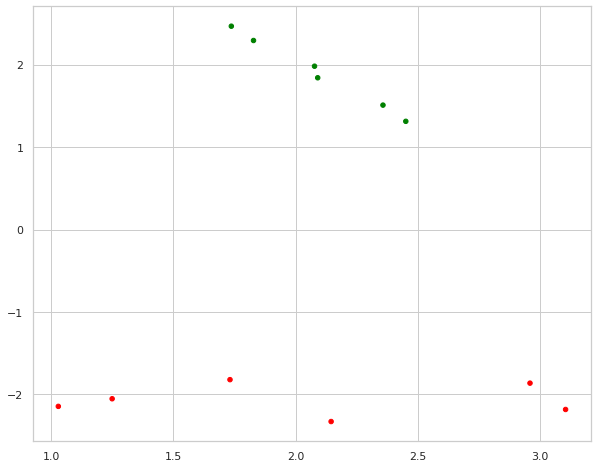

In [2]:
import matplotlib.colors
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pylab import *

import sklearn.datasets as dt

from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","blue","green"])

x,y = dt.make_classification(n_samples=12,
                                 n_features=2,
                                 n_repeated=0,
                                 class_sep=2, 
                                 n_redundant=0,
                                 n_classes=2,
                                 n_clusters_per_class=1,
                                 random_state=2000)

fig = plt.figure(figsize=(10,8))
my_scatter_plot = plt.scatter(x[:,0],
                                  x[:,1],
                                  c=y,
                                  vmin=min(y),
                                  vmax=max(y),
                                  s=20,
                                  cmap=color_map_discrete)

plt.show()

In [3]:
x

array([[ 1.02951538, -2.1449001 ],
       [ 3.10369868, -2.18252668],
       [ 2.95819015, -1.86307868],
       [ 2.14496024, -2.3288833 ],
       [ 2.35698684,  1.5100011 ],
       [ 1.73694128,  2.4674547 ],
       [ 2.0901487 ,  1.84159804],
       [ 2.45037035,  1.31323142],
       [ 2.07713437,  1.98207772],
       [ 1.73150175, -1.820727  ],
       [ 1.24960217, -2.05259851],
       [ 1.82765654,  2.29389615]])

In [4]:
x[0]

array([ 1.02951538, -2.1449001 ])

In [5]:
y

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1])

In [6]:
x[:,0]

array([1.02951538, 3.10369868, 2.95819015, 2.14496024, 2.35698684,
       1.73694128, 2.0901487 , 2.45037035, 2.07713437, 1.73150175,
       1.24960217, 1.82765654])

In [7]:
class0=[]
class1=[]

for i in range(len(y)):
    if(y[i] == 0):
        class0.append(x[i])
    else:
        class1.append(x[i])

In [8]:
client1 = class0[:3] + class1[:3]
clien1_labels = [0,0,0,1,1,1]
client1=np.array(client1)

client2 = class0[3:] + class1[3:]
clien2_labels = [0,0,0,1,1,1]
client2=np.array(client2)

In [9]:
client1

array([[ 1.02951538, -2.1449001 ],
       [ 3.10369868, -2.18252668],
       [ 2.95819015, -1.86307868],
       [ 2.35698684,  1.5100011 ],
       [ 1.73694128,  2.4674547 ],
       [ 2.0901487 ,  1.84159804]])

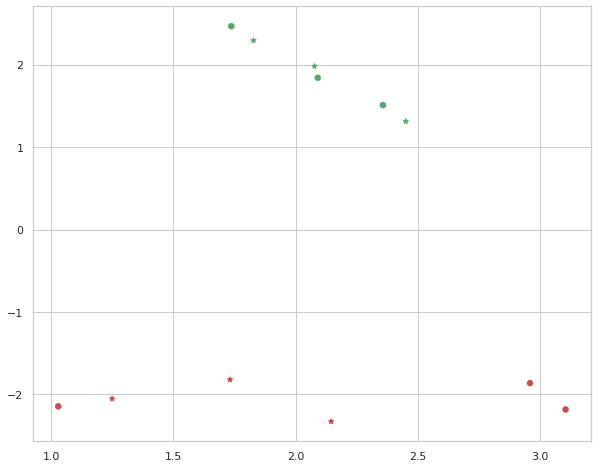

In [10]:
fig, ax = plt.subplots(figsize=(10,8))
xmin, xmax, ymin, ymax = 0.5, 2.6, -3.5, 3

colors=['r','r','r','g','g','g']
ax.scatter(client1[:,0], client1[:,1], c=colors, marker='o', s=30)
ax.scatter(client2[:,0], client2[:,1], c=colors, marker='*', s=30)

plt.show()

In [11]:
def CalMLE(m,b,p,q):
    return pow(q-(m*p+b),2)

In [12]:
import math
def MLE(m,b,X,Y):
    return math.sqrt(sum(list(map(lambda x:CalMLE(m,b,x[0],x[1]),zip(X,Y)))))

In [13]:
# y=1x+2
m1 = 1.3
b1 = 1
CL1 = lambda x:m1*x+b1
# y= -x
m2=1
b2=-2
CL2 = lambda x:m2*x+b2

In [14]:
#error
MLE(m1,b1,client1[:,0],client1[:,1])

11.307644680290108

In [15]:
#error
MLE(m2,b2,client2[:,0],client2[:,1])

4.547605825300762

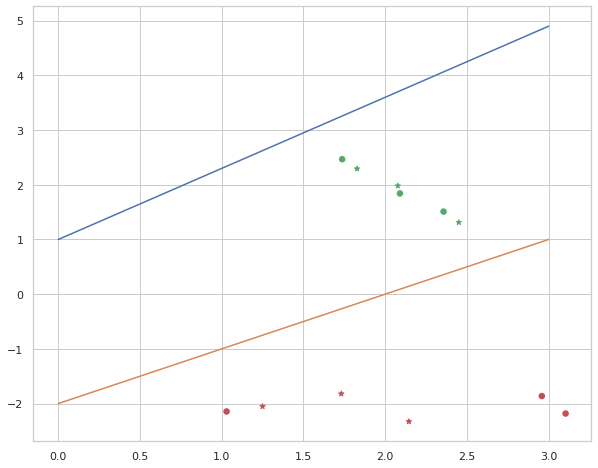

In [37]:
fig, ax = plt.subplots(figsize=(10,8))
xmin, xmax, ymin, ymax = 0.5, 2.6, -3.5, 3

colors=['r','r','r','g','g','g']

ax.scatter(client1[:,0], client1[:,1], c=colors, marker='o', s=30)
ax.plot(list(range(0,4)),list(map(CL1,range(0,4))))

ax.scatter(client2[:,0], client2[:,1], c=colors, marker='*', s=30)
ax.plot(list(range(0,4)),list(map(CL2,range(0,4))))

# ax.plot(list(range(0,4)),list(map(lambda x:-.5*x+3.4,range(0,4))))

plt.show()

In [56]:
X=np.arange(0,4)

def adjust(X_, Y_, LABELS, learning_rate=0.3, slope=1):
    line = None
    counter = 0
    slpoes=[]
    for x, y, label in zip(X_,Y_,LABELS):
#         print(x)
#         print(y)
#         print(label)
        res = slope * x - y
#         print(label, res)
        if label == 0 and res < 0:
            # point is above line but should be below 
            # => increment slope
            slope += learning_rate
            slpoes.append(slope)
            counter += 1
            ax.plot(X, slope * X, 
                    linewidth=2, label=str(counter))

        elif label == 1 and res > 0:
            # point is below line but should be above 
            # => decrement slope
            #print(res, label)
            slope -= learning_rate
            slpoes.append(slope)
            counter += 1
            ax.plot(X, slope * X,  
                    linewidth=2, label=str(counter))
    return slpoes


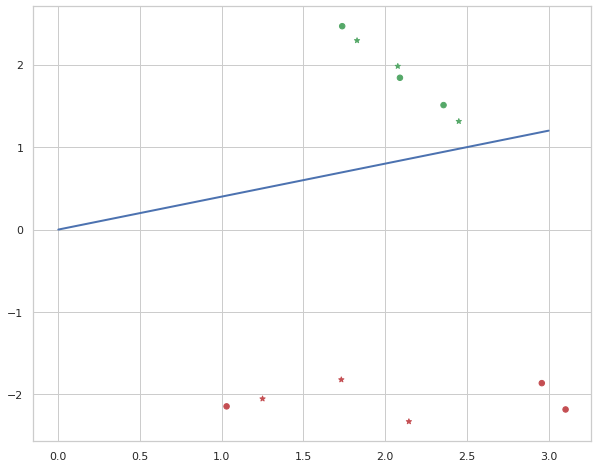

In [43]:
m_global = adjust(x[:,0], x[:,1], y)

fig, ax = plt.subplots(figsize=(10,8))
xmin, xmax, ymin, ymax = 0.5, 2.6, -3.5, 3

colors=['r','r','r','g','g','g']

ax.scatter(client1[:,0], client1[:,1], c=colors, marker='o', s=30)

ax.scatter(client2[:,0], client2[:,1], c=colors, marker='*', s=30)

ax.plot(X, m_global * X, linewidth=2)

plt.show()

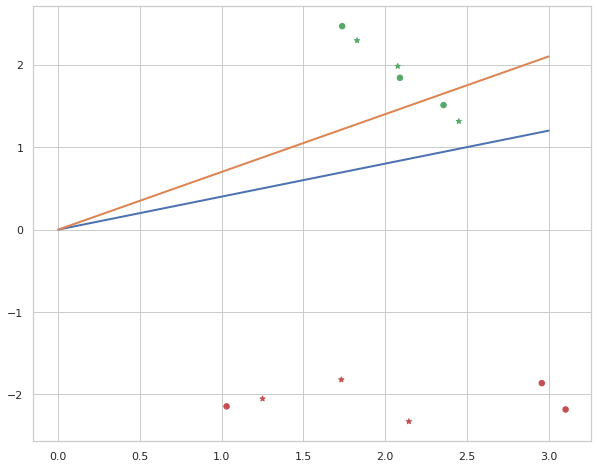

In [50]:
m1 = adjust(client1[:,0], client1[:,1], clien1_labels)
m2 = adjust(client2[:,0], client2[:,1], clien2_labels)

fig, ax = plt.subplots(figsize=(10,8))
xmin, xmax, ymin, ymax = 0.5, 2.6, -3.5, 3

colors=['r','r','r','g','g','g']

ax.scatter(client1[:,0], client1[:,1], c=colors, marker='o', s=30)

ax.scatter(client2[:,0], client2[:,1], c=colors, marker='*', s=30)

ax.plot(X, m_global * X, linewidth=2, label='global')
ax.plot(X, m1 * X, linewidth=2, label='client1')
ax.plot(X, m2 * X, linewidth=2, label='client2')

plt.show()

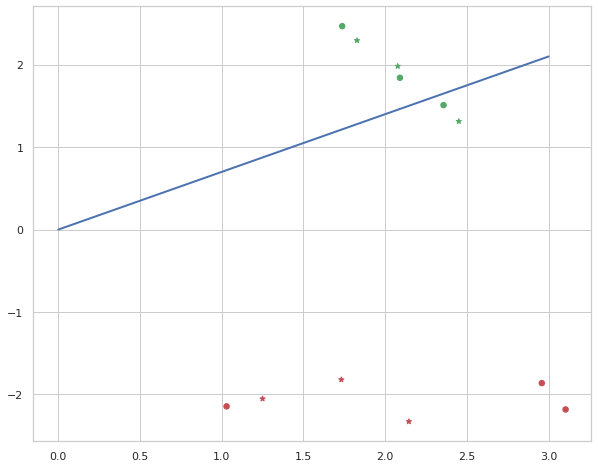

In [57]:
ssss = adjust(client1[:,0], client1[:,1], clien1_labels)

fig, ax = plt.subplots(figsize=(10,8))
xmin, xmax, ymin, ymax = 0.5, 2.6, -3.5, 3

colors=['r','r','r','g','g','g']

ax.scatter(client1[:,0], client1[:,1], c=colors, marker='o', s=30)

ax.scatter(client2[:,0], client2[:,1], c=colors, marker='*', s=30)

for i in range(len(ssss)):
    ax.plot(X, ssss[i] * X, linewidth=2, label=str(i))
    
plt.show()
    

In [58]:
len(ssss)

1